# Matplotlib

- **[plt.plot()](#plt.plot())**
- **[Styles](#Styles)**
- **[Information](#Information)**
    - [pd.DataFrame()](#pd.DataFrame())
    - [pd.read_csv()](#pd.read_csv())
- **[Exercise](#Exercise)**
- **[Simultaneous Plots](#Simultaneous-Plots)**
    - [plt.subplot()](#plt.subplot())
    - [plt.figure()](#plt.figure())
    - [plt.subplots()](#plt.subplots())
- **[Plot Types](#Plot-Types)**
    - [plt.scatter()](#plt.scatter())
    - [plt.hist()](#plt.hist())
    - [plt.bar()](#plt.bar())
    - [plt.boxplot()](#plt.boxplot())
- **[Save Plots](#Save-Plots)**
    - [plt.savefig()](#plt.savefig())
    - [fig.savefig()](#fig.savefig())
    - [pdf.savefig()](#pdf.savefig())

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# magic command otherwise plot in different window?
%matplotlib inline

## plt.plot()

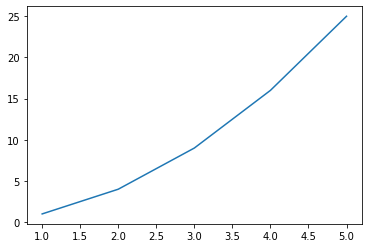

In [16]:
x = [1, 2, 3, 4, 5]
# y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x, y)

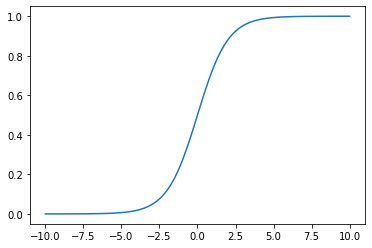

In [14]:
# sigmoid function plot
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z)

In [15]:
df = pd.DataFrame({'A1': [1, 2, 3, 4, 5, 6],
                  'A2': [10, 15, 40, 100, 200, 400]})

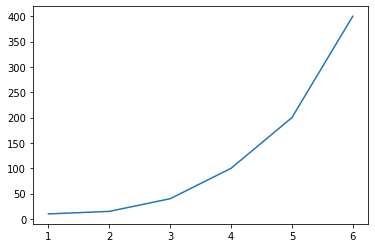

In [16]:
# plt.plot(df['a'], df['b'])
plt.plot('A1', 'A2', data=df)

## Styles

In [29]:
x = np.linspace(-10, 10, 10)
z = 1 / (1 + np.exp(-x))

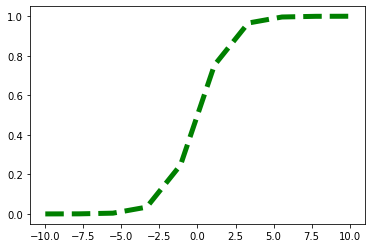

In [30]:
plt.plot(x, z, 'g--', linewidth=5)

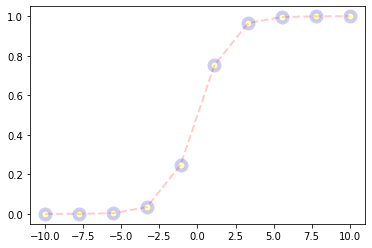

In [37]:
plt.plot(x, z,
        color='r',
        lw=2,
        ls='--',
        marker='o',
        markersize=10,
        markerfacecolor='yellow',
        markeredgecolor='blue',
        markeredgewidth=4,
        alpha=0.2)

## Information

([<matplotlib.axis.YTick at 0x7fac351ec610>,
 <a list of 3 Text yticklabel objects>)

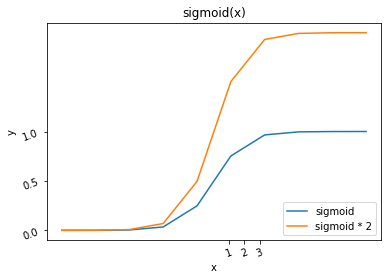

In [45]:
plt.plot(x, z, label='sigmoid')
plt.plot(x, z*2, label='sigmoid * 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid(x)')
plt.legend(loc=4)
plt.xticks([1, 2, 3], rotation=20)
plt.yticks([0, 0.5, 1], rotation=20)

## Exercise

With movie dataset,  
1. Plot the number of movies as a function of years
2. Plot statistics(median, mean, maximum) of revenue as a function of years

In [93]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[~(df['release_date'].isna())]  # filter NaN out

# def get_year(release_data):
#     return release_data[:4]

# df['year'] = df['release_date'].apply(get_year)
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

type(np.nan)  # TypeError: 'float' object is not subscriptable
df[df['release_date'].isna()]

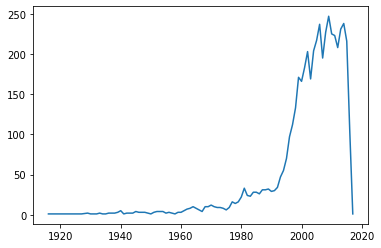

In [94]:
plt.plot(df.groupby('year').count()['id'])

In [95]:
# revenue change
df = df[df['revenue'] != 0]

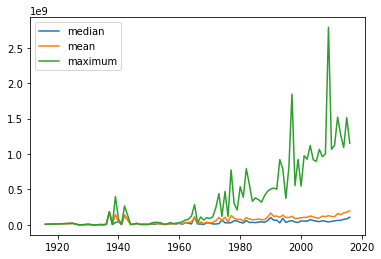

In [100]:
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
plt.plot(df.groupby('year')['revenue'].max(), label='maximum')
plt.legend()

## Simultaneous Plots

### plt.subplot()

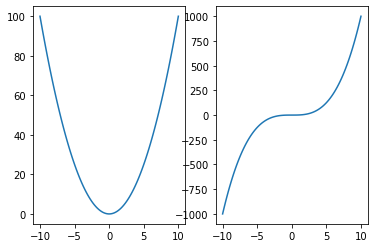

In [107]:
x = np.linspace(-10, 10, 100)
plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### plt.figure()

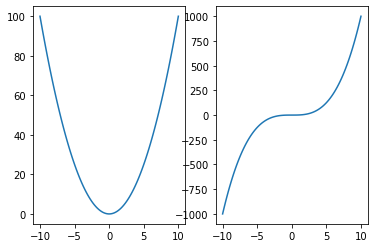

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x, x**2)
ax2.plot(x, x**3)

### plt.subplots()

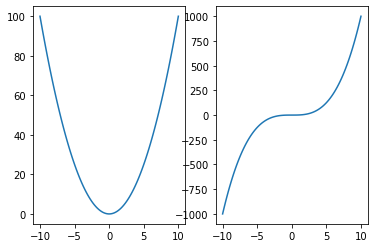

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

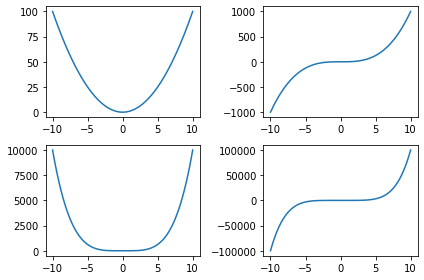

In [123]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 0].plot(x, x**4)
axes[1, 1].plot(x, x**5)
fig.tight_layout()

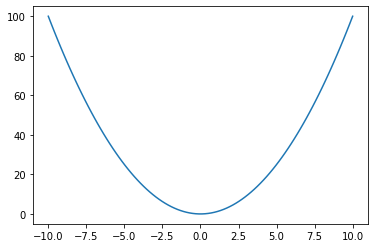

In [127]:
fig, ax = plt.subplots()
ax.plot(x, x**2)

(-11.0, 11.0, -1100.0, 1100.0)

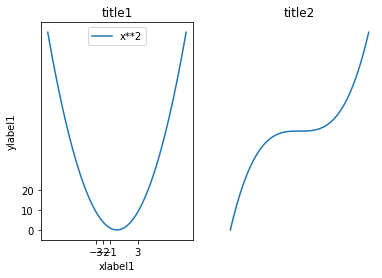

In [133]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2, label='x**2')
axes[1].plot(x, x**3)
axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('ylabel1')
axes[0].set_title('title1')
axes[1].set_title('title2')
axes[0].set_xticks([-3, -2, -1, 3])
axes[0].set_yticks([0, 10, 20])
axes[0].legend()
axes[1].axis('off')

## Plot Types

### plt.scatter()

In [134]:
df = pd.read_csv('tmdb_5000_movies.csv')

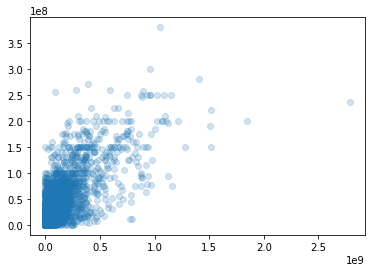

In [136]:
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

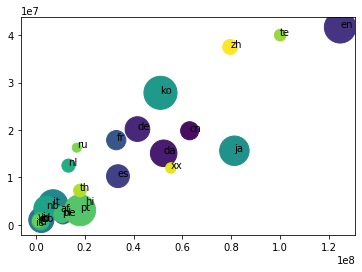

In [156]:
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
langu_group_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]
c = np.arange(len(langu_group_df))
plt.scatter('revenue', 'budget', s='vote_count', c=c, data=langu_group_df)

# for idx, row in langu_group_df.iterrows():
#     plt.annotate(idx, (row['revenue'], row['budget']))

[plt.annotate(idx, (row['revenue'], row['budget'])) for idx, row in langu_group_df.iterrows()]
plt.show()

### plt.hist()

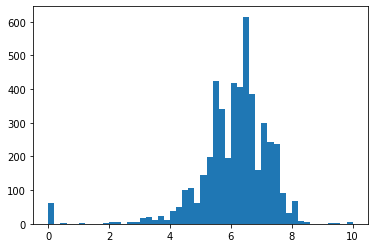

In [154]:
df = pd.read_csv('tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=50)
plt.show()  # omit return 

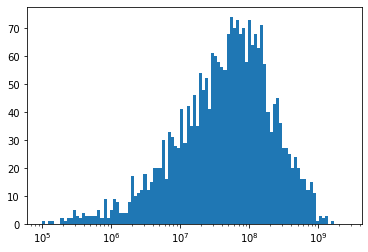

In [165]:
# plot the histgram for profit (revenue - budget)
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['profit'] = df['revenue'] - df['budget']
# df['profit'] = df.apply(lambda row: row['revenue'] - row['budget'], axis=1)

# plt.hist(df['profit'])
# plt.show()

fig, axes = plt.subplots()
logbins = np.logspace(5, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)
axes.set_xscale('log')
plt.show()

### plt.bar()

In [167]:
df = pd.DataFrame({'category': ['A', 'B', 'C'], 'val': [10, 20, 30]})
df

,category,val
0,A,10
1,B,20
2,C,30


<BarContainer object of 3 artists>

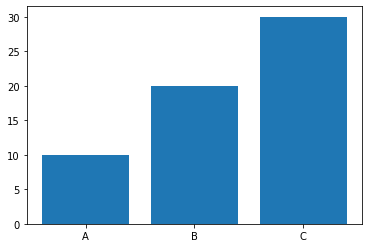

In [170]:
plt.bar('category', 'val', data=df)
# plt.bar(df['category'], df['val'])

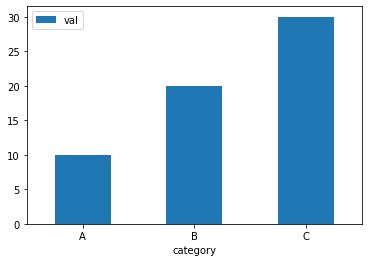

In [172]:
df.plot('category', 'val', kind='bar', rot=0)

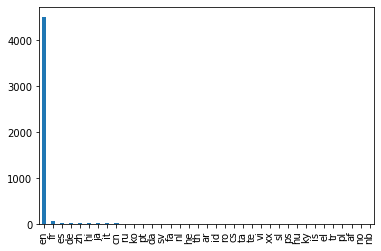

In [174]:
df = pd.read_csv('tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

### plt.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fac308b1250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fac308b2fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fac308b1850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fac308b3210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fac308b2c10>],
 'means': []}

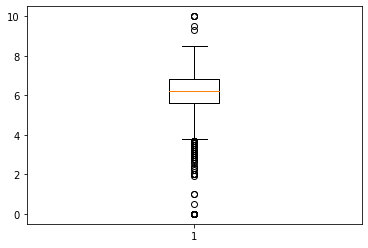

In [177]:
df = pd.read_csv('tmdb_5000_movies.csv')
# plt.boxplot('vote_average', data=df)
plt.boxplot(df['vote_average'])

## Save Plots

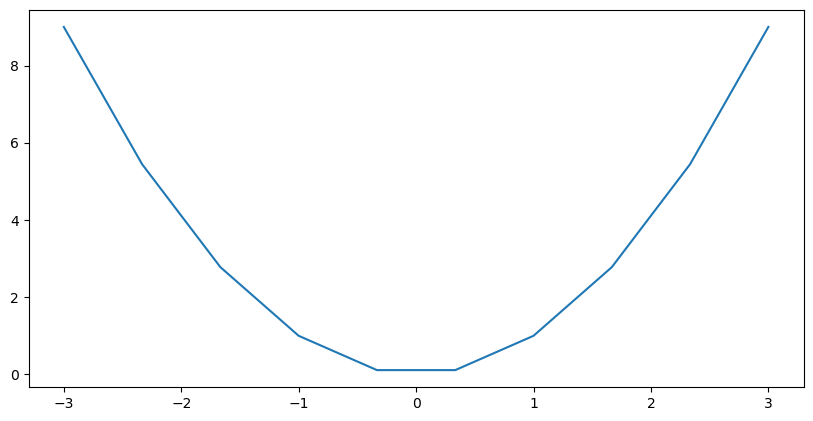

In [183]:
x = np.linspace(-3, 3, 10)
# dpi = dot per inch
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(x, x**2)

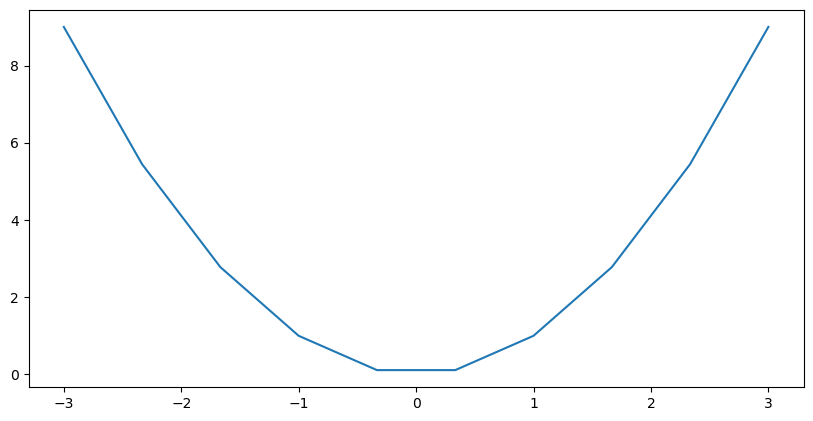

In [186]:
fig, axes = plt.subplots(figsize=(10, 5), dpi=100)
axes.plot(x, x**2)

### plt.savefig()

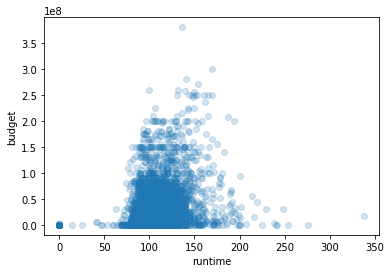

In [189]:
df = pd.read_csv('tmdb_5000_movies.csv')
plt.scatter('runtime', 'budget', data=df, alpha=0.2)
plt.xlabel('runtime')
plt.ylabel('budget')
plt.savefig('runtime_budget_scatter.png')

### fig.savefig()

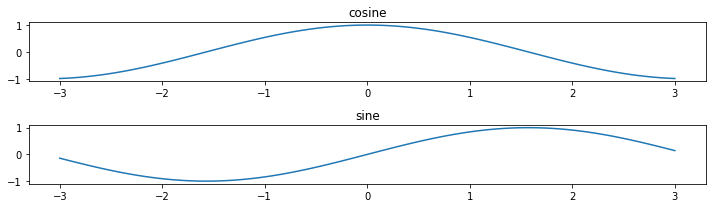

In [193]:
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x = np.linspace(-3, 3, 100)
axes[0].set_title('cosine')
axes[0].plot(x, np.cos(x))
axes[1].set_title('sine')
axes[1].plot(x, np.sin(x))
fig.tight_layout()
fig.savefig('cos_sin.png')

### pdf.savefig()

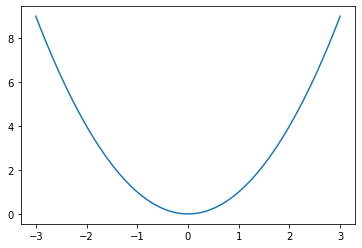

In [195]:
# pdf save
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('pdf_files.pdf')

fig, axes = plt.subplots()
axes.plot(x, x**2)
pdf.savefig(fig)
pdf.close()

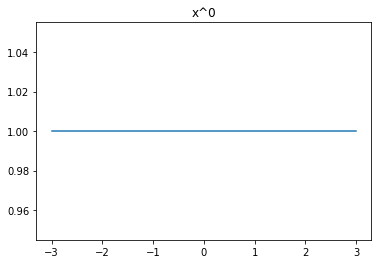

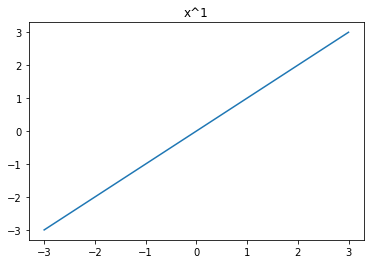

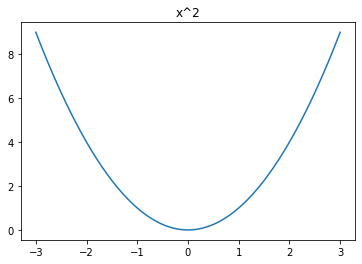

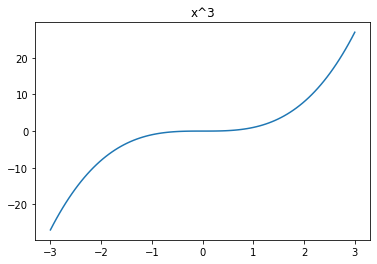

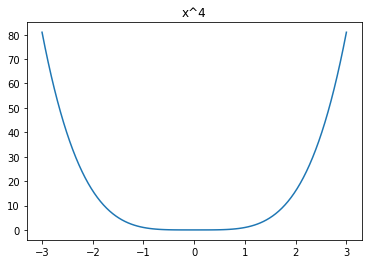

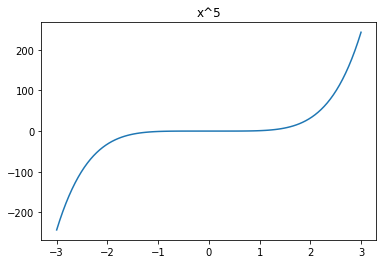

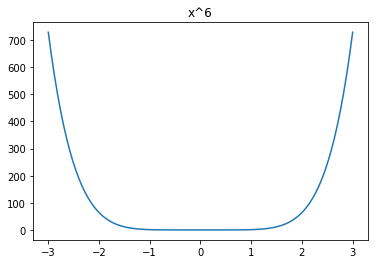

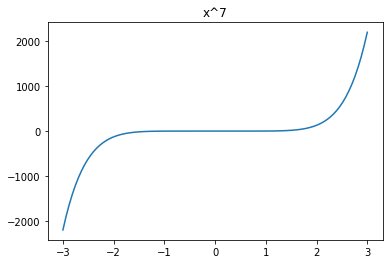

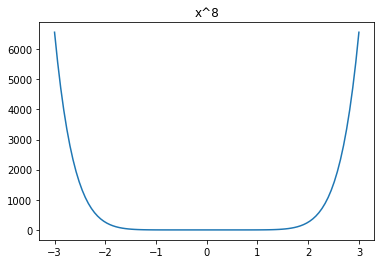

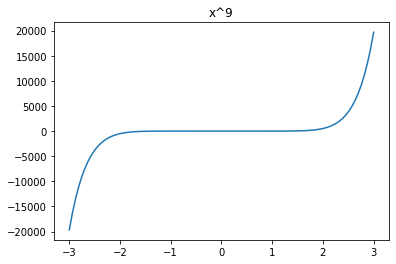

In [198]:
pdf = PdfPages('save_multifig_sample.pdf')
for i in range(10):
    fig, axes = plt.subplots()
    axes.plot(x, x**i)
    axes.set_title(f'x^{i}')
    pdf.savefig(fig)
pdf.close()